In [10]:
####Perform image enhancement using point processing techniques####
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color
from skimage import io
figsize=(15,15)
#upload=files.upload()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc743cc7e50>,
 (-0.5, 255.5, 255.5, -0.5),
 Text(0.5, 1.0, 'grayscale_image'))

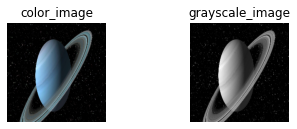

In [2]:
im=cv2.imread('saturn.jpg')
im2=cv2.resize(im,(256,256))
im3=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
plt.subplot(221),plt.imshow(im2),plt.axis("off"),plt.title("color_image")
plt.subplot(222),plt.imshow(im3,cmap=plt.cm.gray),plt.axis("off"),plt.title("grayscale_image")

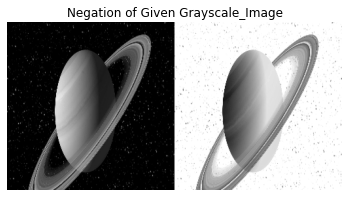

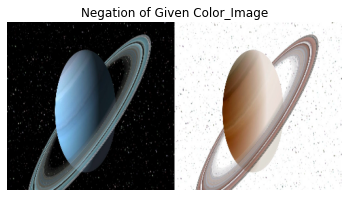

In [3]:
############################Point Processing####################################
##################### Negation of Given Grayscale Image #####################
im11=255-im3
im12=255-im2
a1=np.concatenate((im3,im11),axis=1)
plt.imshow(a1,cmap='gray')
plt.axis("off")
plt.title('Negation of Given Grayscale_Image')
plt.show()
a2=np.concatenate((im2,im12),axis=1)
plt.imshow(a2)
plt.axis("off")
plt.title('Negation of Given Color_Image')
plt.show()

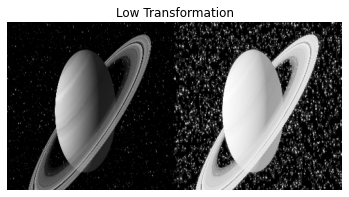

In [4]:
####################### Log Transformation #######################
c=255/np.log(1+np.max(im3))
log_im=c*(np.log(im3+1))
ax2=np.concatenate((im3,log_im),axis=1, dtype=np.float64)
plt.title('Low Transformation'),
plt.imshow(ax2,cmap=plt.cm.gray),
plt.axis("off")
plt.show()

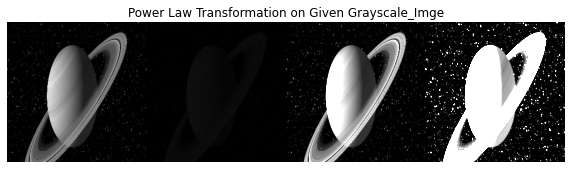

In [5]:
################ Power Law Transformation on Grayscale Image ############
g1=0.5 #gamma value 1
g2=1.1 #gamma value 2
g3=1.5 #gamma value 3
c1=1
im111=c1*np.power(im3,g1) ###############power transformation using gamma=0.5
im112=c1*np.power(im3,g2) ###############power transformation using gamma=1.1
im113=c1*np.power(im3,g3) ###############power transformation using gamma=1.5
ax3=np.concatenate((im3,im111,im112,im113),axis=1)
plt.figure(figsize=figsize)
plt.imshow(ax3,cmap='gray',vmin=0,vmax=256),plt.axis("off")
plt.title('Power Law Transformation on Given Grayscale_Imge')
plt.show()

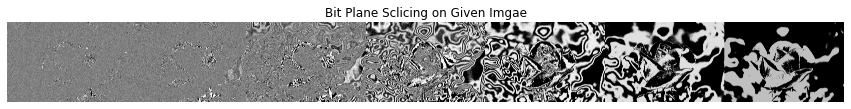

In [11]:
############Bit plane sclicing on given image############
img = cv2.imread('rose.jpg',0)
out = []
row= img.shape[0]
col= img.shape[1]
for k in range(0,7):
  # create an image for each k bit plane
  plane = np.full((row, col), 2 ** k, np.uint8)
  # execute bitwise and operation
  res = cv2.bitwise_and(plane, img)
  # multiply ones (bit plane sliced) with 255 just for better visulization
  x = res*255
  # append to the output list
  out.append(x)
plt.figure(figsize=figsize)
plt.title('Bit Plane Sclicing on Given Imgae')
plt.imshow(np.hstack(out),cmap='gray',vmin=0,vmax=256)
#plt.title('Bit Plane Sclicing on Given Imge')
plt.axis("off")
plt.show()
#im1=out.pop(0)
#cv2_imshow(im1)
#cv2.waitkey()


Text(0.5, 1.0, 'Contrast Stretch Image')

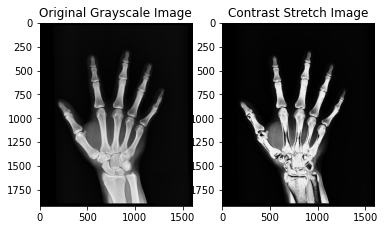

In [12]:
############Contrast Strecthing on given image############
gray_img = cv2.imread('xray.jpg',0)
[rows,cols] = gray_img.shape;
Contr_Strech=gray_img;
r1=50    
r2=150   
alpha=0.5
beta=2
Gama=0.5
s1=alpha*r1;
s2=beta*(r2-r1)+s1;
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1.imshow(gray_img,cmap=plt.cm.gray)
ax1.set_title('Original Grayscale Image')
for r in range(0, rows-1):
  for c in range(0, cols-1):
    if (gray_img[r,c]<=r1):
      Contr_Strech[r,c]=alpha*gray_img[r,c]
      s1=alpha*r1;
    elif (gray_img[r,c]<=r2):
      Contr_Strech[r,c]=beta*(gray_img[r,c]-r1)+s1;
      s2=beta*(r2-r1)+s1;
    else:
      Contr_Strech[r,c]=Gama*(gray_img[r,c]-r2)+s2;

ax2=fig.add_subplot(1,2,2)
ax2.imshow(Contr_Strech,cmap=plt.cm.gray)
ax2.set_title('Contrast Stretch Image')

In [13]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf   import colab_pdf
colab_pdf("point_processing.ipynb")